In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from scipy.optimize import curve_fit

sns.set_context('talk')
sns.set_style("ticks")
sns.set_palette("colorblind")

def line(x,m,b):
    return (m*x) + b
    

def read_QDP(file):
#     Takes in a file and returns an array with the QDP data
    data = [[]]
    i = 0
    j = 0
    for line in file:
        if i >2:
            temp = line.split()
            if temp[0] != 'NO':
                if temp[-1]=='NO':
                    temp = temp[:-1]
                data[-1].append(temp)
            else:
                data.append([])
        i += 1
    for i in range(len(data)):
        data[i] = np.array(data[i]).astype(float).T
    return data

OBSID='90701338002'

root_dir = '/Volumes/Samsung_1TB/AstroData/MAXI_J1749m204/'
pipe_dir = root_dir + OBSID + '_pipe_out/'
fig_dir = root_dir + 'figures/'

spectra_data = read_QDP(open(root_dir + '90701338002_products06/fake_A_tbabs_bb.qdp', 'r'))

a_Rin = [(12,0.4), (25, 0.4), (50, 0.4), (6, 0.0), (6, 0.1), (6, 0.2), (6, 0.3), (6, 0.4)]



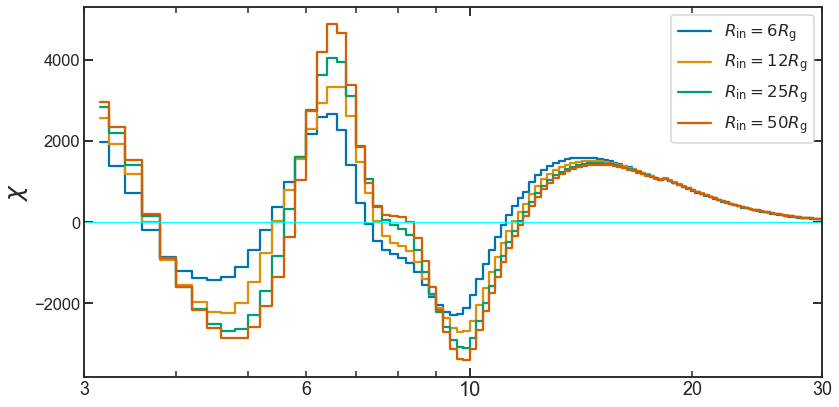

In [55]:
lw = 2.0
# ls = 'steps'
ls=''

# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig, (ax1) = plt.subplots(1,1, sharex=True,  gridspec_kw = {'height_ratios':[1], 'hspace':0}, figsize=(12, 6))

# ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
#          np.concatenate([data_soft[0][4], [data_soft[0][4][-1]]]), where='post', color='C0', lw=0.5*lw)

# ax1.errorbar(spectra_data[3][0],(spectra_data[3][2]-spectra_data[3][4])/spectra_data[3][3], xerr=spectra_data[3][1], yerr=1.0, \
#              ls=ls, lw=lw)
# ax1.errorbar(spectra_data[4][0],(spectra_data[4][2]-spectra_data[4][4])/spectra_data[4][3], xerr=spectra_data[4][1], yerr=1.0, \
#              ls=ls, lw=lw)
# ax1.errorbar(spectra_data[5][0],(spectra_data[5][2]-spectra_data[5][4])/spectra_data[5][3], xerr=spectra_data[5][1], yerr=1.0, \
#              ls=ls, lw=lw)
# ax1.errorbar(spectra_data[6][0],(spectra_data[6][2]-spectra_data[6][4])/spectra_data[6][3], xerr=spectra_data[6][1], yerr=1.0, \
#              ls=ls, lw=lw)
# ax1.errorbar(spectra_data[7][0],(spectra_data[7][2]-spectra_data[7][4])/spectra_data[7][3], xerr=spectra_data[7][1], yerr=1.0, \
#              ls=ls, lw=lw)

# ax1.errorbar(spectra_data[0][0],(spectra_data[0][2]-spectra_data[0][4])/spectra_data[0][3], xerr=spectra_data[0][1], yerr=1.0, \
#              ls=ls, lw=lw)
# ax1.errorbar(spectra_data[1][0],(spectra_data[1][2]-spectra_data[1][4])/spectra_data[1][3], xerr=spectra_data[1][1], yerr=1.0, \
#              ls=ls, lw=lw)
# ax1.errorbar(spectra_data[2][0],(spectra_data[2][2]-spectra_data[2][4])/spectra_data[2][3], xerr=spectra_data[2][1], yerr=1.0, \
#              ls=ls, lw=lw)
# ax1.errorbar(spectra_data[7][0],(spectra_data[7][2]-spectra_data[7][4])/spectra_data[7][3], xerr=spectra_data[7][1], yerr=1.0, \
#              ls=ls, lw=lw)

ax1.step(spectra_data[7][0],(spectra_data[7][2]-spectra_data[7][4])/spectra_data[7][3], label=r'$R_{\mathrm{in}}=6R_\mathrm{g}$', where='mid', color='C0')
ax1.step(spectra_data[0][0],(spectra_data[0][2]-spectra_data[0][4])/spectra_data[0][3], label=r'$R_{\mathrm{in}}=12R_\mathrm{g}$', where='mid', color='C1')
ax1.step(spectra_data[1][0],(spectra_data[1][2]-spectra_data[1][4])/spectra_data[1][3], label=r'$R_{\mathrm{in}}=25R_\mathrm{g}$', where='mid', color='C2')
ax1.step(spectra_data[2][0],(spectra_data[2][2]-spectra_data[2][4])/spectra_data[2][3], label=r'$R_{\mathrm{in}}=50R_\mathrm{g}$', where='mid', color='C3')

ax1.set_xscale('log')
ax1.set_ylabel(r'$\chi$', fontsize=25)
ax1.axhline(0,color='cyan', lw=1.0)
# ax2.set_ylabel(r'$\frac{data}{model}$')
# ax2.axhline(1,color='cyan', lw=1.0)
# ax2.set_ylabel(r'$\chi$', fontsize=25)
# ax2.axhline(0,color='cyan', lw=1.0)
ax1.set_xlim(3, 30)

# ax1.text(2.9, 2e-5, '(a)')
# ax2.text(2.9, -4, '(b)')

# ax1.set_yticks(ticks= [1e-2, 1e-1], minor=False)
# # ax1.set_yticks(ticks= [], minor=True)

# ax2.set_yticks(ticks= [-3, 0, 3], minor=False)
# ax2.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

# ax2.set_xticks(ticks= [10], minor=False)
# ax2.set_xticklabels(labels= [10], minor=False, fontsize=14)

ax1.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30], minor=True)
ax1.set_xticklabels(labels= [3, '', '', 6, '', '', '', 20, 30], minor=True, fontsize=18)
ax1.set_xticks(ticks= [10], minor=False)
ax1.set_xticklabels(labels= [10], minor=False, fontsize=20)

ax1.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
# ax2.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)

ax1.legend()

plt.tight_layout()

plt.savefig(fig_dir + 'fake_A_tbabs_bb.pdf')

